# CapstoneThree - Pre-Processing & Modeling


## Health Insurance Premium Data

#### Models Applied:
  1. Linear Regression
  2. KNN Regression
  3. Random Forest Regression
  4. Gradient Boosting Regression

### Preparing Data - Load and convert categorical data to binaries

In [1]:
# import necessary modules

import pandas as pd
import numpy as np

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# load file prepared in the "Data-Wrangling" stage

df = pd.read_excel('insurance_data.xlsx', index_col=0)
df.head()

,age,sex,bmi,children,smoker,region,charges,monthly_charge,age_group,weight_status
0,19,female,27.900,0,yes,southwest,16884.92400,1407.08,10s,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,143.80,10s,Obese
2,28,male,33.000,3,no,southeast,4449.46200,370.79,20s,Obese
3,33,male,22.705,0,no,northwest,21984.47061,1832.04,30s,Normal
4,32,male,28.880,0,no,northwest,3866.85520,322.24,30s,Overweight


In [3]:

# convert 'sex' and 'smoker' to binary

df_prep = df[['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'monthly_charge']]
df_prep['gender'] = np.where(df['sex']=='female', 1, 0)  # female = 1, male = 0
df_prep['smoking'] = np.where(df['smoker']=='yes', 1, 0)  # smoker = 1, non-smoker = 0


<ipython-input-3-3d9b891546fa>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['gender'] = np.where(df['sex']=='female', 1, 0)  # female = 1, male = 0
<ipython-input-3-3d9b891546fa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_prep['smoking'] = np.where(df['smoker']=='yes', 1, 0)  # smoker = 1, non-smoker = 0


In [4]:
df_prep.drop(['sex', 'smoker'], axis = 1, inplace = True)
df_prep.head()

C:\Users\junko\Anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,age,bmi,children,region,monthly_charge,gender,smoking
0,19,27.900,0,southwest,1407.08,1,1
1,18,33.770,1,southeast,143.80,0,0
2,28,33.000,3,southeast,370.79,0,0
3,33,22.705,0,northwest,1832.04,0,0
4,32,28.880,0,northwest,322.24,0,0


In [5]:
# change 'region' to binary

df_dummy = pd.get_dummies(df_prep)
df_dummy.head()

,age,bmi,children,monthly_charge,gender,smoking,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1407.08,1,1,0,0,0,1
1,18,33.770,1,143.80,0,0,0,0,1,0
2,28,33.000,3,370.79,0,0,0,0,1,0
3,33,22.705,0,1832.04,0,0,0,1,0,0
4,32,28.880,0,322.24,0,0,0,1,0,0


### Data Splitting and Scaling

In [6]:
X = df_dummy.drop(['monthly_charge'], axis = 1)
y = df_dummy['monthly_charge']

In [7]:
# split data into 80% training and 20% testing 

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [8]:
# apply StandardScaler

sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [9]:
print(X_train_sc)


[[-0.14853305  0.54530479  2.41394802 ... -0.55791981 -0.6155209
   1.70862925]
 [-1.49780784  0.59867181 -0.89219519 ... -0.55791981  1.6246402
  -0.58526447]
 [-1.14273553  0.96092064  0.76087642 ... -0.55791981 -0.6155209
  -0.58526447]
 ...
 [ 0.06451033 -0.91339361 -0.89219519 ... -0.55791981  1.6246402
  -0.58526447]
 [-1.42679338  0.77656186 -0.89219519 ...  1.79237229 -0.6155209
  -0.58526447]
 [-0.4325909  -1.97749955 -0.06565939 ... -0.55791981 -0.6155209
   1.70862925]]


In [10]:
# import modules

#from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from sklearn import metrics

from sklearn.metrics import roc_curve, auc, f1_score, accuracy_score, classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import r2_score,mean_squared_error
#from sklearn.neighbors import KNeighborsRegressor

accuracy_comparison = []

### Model 1 - Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression

#grid_lr = LinearRegression()
model_lr = LinearRegression()
model_lr.fit(X_train,y_train)

LinearRegression()

#### Applying the model and predicting the Insurance price

In [12]:
y_pred_lr = model_lr.predict(X_test)

#### Model Accuracy

In [13]:
lr_accuracy = r2_score(y_test,y_pred_lr)
accuracy_comparison.append(['Linear', lr_accuracy])

print("Accuracy:", lr_accuracy)
print("MSE:", mean_squared_error(y_test,y_pred_lr))


Accuracy: 0.7999878663653888
MSE: 221027.1865234794


#### Predicted Insurance Fees

In [14]:
preds = pd.DataFrame({'Actual Fees': y_test,
                      'Predicted Fees': y_pred_lr,
                      'Difference': round(y_pred_lr - y_test, 2)})
                      #'Accuracy %': round(y_pred_lr / y_test, 1) * 100})
preds.head()

,Actual Fees,Predicted Fees,Difference
578,810.38,930.827575,120.45
610,712.31,790.559131,78.25
569,3808.50,3181.759554,-626.74
1034,1079.17,1355.526039,276.36
198,803.69,576.220709,-227.47


### Model 2 - KNN Regression

#### Hyperparameter Tuning

In [15]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor()

In [16]:
# define and identify best hyperparameters

param_grid = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

grid_kr = GridSearchCV(estimator=knn_reg, param_grid=param_grid, scoring='r2')

grid_kr.fit(X_train, y_train)
#grid_kr.fit(X, y)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid=[{'n_neighbors': [2, 3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}],
             scoring='r2')

In [17]:
# show best hyperparameters

print(grid_kr.best_score_)
print(grid_kr.best_estimator_)
print(grid_kr.best_params_)

0.09601746293743599
KNeighborsRegressor(n_neighbors=6, weights='distance')
{'n_neighbors': 6, 'weights': 'distance'}


#### Applying the model and predicting the Insurance price

In [18]:
# apply best hyperparameters

model_kr = KNeighborsRegressor(n_neighbors=4, weights='distance')
model_kr.fit(X_train, y_train)
y_pred_kr = model_kr.predict(X_test)

#### Model Accuracy

In [19]:
# display accuracy score and MSE 

kr_accuracy = r2_score(y_test,y_pred_kr)
accuracy_comparison.append(['KNN', kr_accuracy])

print("Accuracy:", r2_score(y_test,y_pred_kr))
print("MSE:", mean_squared_error(y_test,y_pred_kr))

Accuracy: 0.3162997643772256
MSE: 755535.8605453712


#### Predicted Insurance Fees

In [20]:
# display first five rows of predicted data

preds = pd.DataFrame({'Actual Fees': y_test,
                      'Predicted Fees': y_pred_kr,
                      'Difference': round(y_pred_kr - y_test, 2)})
preds.head()

,Actual Fees,Predicted Fees,Difference
578,810.38,829.487601,19.11
610,712.31,694.383451,-17.93
569,3808.50,1517.929712,-2290.57
1034,1079.17,1093.988995,14.82
198,803.69,1010.113602,206.42


### Model 3 - Random Forest

#### Hyperparameter Tuning

In [21]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor()

In [22]:
# define and identify best hyperparameters

param_grid = [{'n_estimators':[40, 50, 100, 200, 300], 'max_features':[6, 8, 10, 15]}, 
              {'bootstrap':[False], 'n_estimators': [3, 10], 'max_features': [2, 3,  4]}]

grid_search = GridSearchCV(rf_reg, param_grid, cv= 5, scoring = 'neg_mean_squared_error', return_train_score = True)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\junko\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\junko\Anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)

{'max_features': 6, 'n_estimators': 300}


#### Applying the model and predicting the Insurance price

In [23]:
model_rf = RandomForestRegressor(n_jobs = 2, random_state = 0, n_estimators = 300, max_features = 6)
model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)

#### Model Accuracy

In [24]:
rf_accuracy = r2_score(y_test, y_pred_rf)
accuracy_comparison.append(['RandomForest', rf_accuracy])

print("Accuracy:", r2_score(y_test, y_pred_rf))
print("MSE:", mean_squared_error(y_test, y_pred_rf))

Accuracy: 0.8911724373018333
MSE: 120261.95392388401


#### Predicted Insurance Fees

In [25]:
preds = pd.DataFrame({'Actual Fees': y_test,
                      'Predicted Fees': y_pred_rf,
                      'Difference': round(y_pred_rf - y_test, 2)})
preds.head()

,Actual Fees,Predicted Fees,Difference
578,810.38,862.517900,52.14
610,712.31,797.319700,85.01
569,3808.50,3688.638500,-119.86
1034,1079.17,1127.982333,48.81
198,803.69,825.816500,22.13


#### Feature Importance

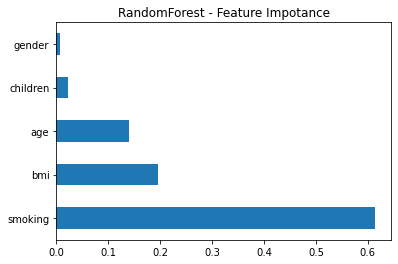

In [26]:
feat_importances = pd.Series(model_rf.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('RandomForest - Feature Impotance')
plt.show()

### Model 4 - Gradient Boosting

#### Hyperparameter Tuning

In [27]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.datasets import make_regression
from sklearn.ensemble import GradientBoostingClassifier

gb_reg = GradientBoostingRegressor(random_state=0)

In [28]:
# hyperparameter list to evaluate

estimators = [5,50,250,500]
depth = [1,3,5,7,9]
learning = [0.01,0.1,1,10,100]

param_gb = dict(n_estimators = estimators, max_depth = depth, learning_rate = learning)


In [29]:
search_grid={'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=gb_reg,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=5)

In [30]:
search.fit(X_train, y_train)
search.best_params_


{'learning_rate': 0.01,
 'max_depth': 2,
 'n_estimators': 1000,
 'random_state': 1,
 'subsample': 0.75}

In [31]:
model_gb = GradientBoostingRegressor(learning_rate = 0.01,
 max_depth= 2, 
 n_estimators = 1000,
 random_state = 1,
 subsample = 0.75)


#### Applying the model and predicting the Insurance price

In [32]:
model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

#### Model Accuracy

In [33]:
gb_accuracy = r2_score(y_test, y_pred_gb)
accuracy_comparison.append(['GradientBoosting', gb_accuracy])

print("Accuracy:", r2_score(y_test, y_pred_gb))
print("MSE:", mean_squared_error(y_test, y_pred_gb))

Accuracy: 0.9013290454363272
MSE: 109038.20224544976


#### Predicted Insurance Fees

In [34]:
preds = pd.DataFrame({'Actual Fees': y_test,
                      'Predicted Fees': y_pred_gb,
                      'Difference': round(y_pred_gb - y_test, 2)})
preds.head()

,Actual Fees,Predicted Fees,Difference
578,810.38,1034.469001,224.09
610,712.31,853.175103,140.87
569,3808.50,3814.204146,5.70
1034,1079.17,1252.301274,173.13
198,803.69,888.910033,85.22


#### Feature Importance

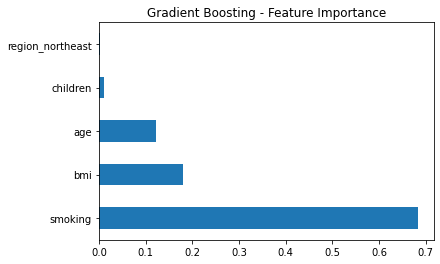

In [35]:
feat_importances = pd.Series(model_gb.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.title('Gradient Boosting - Feature Importance')
plt.show()

#### Model Accuracy Comparison

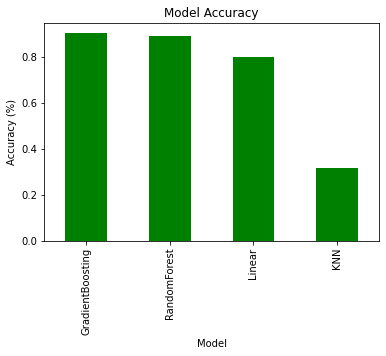

In [36]:
model_comparison = pd.DataFrame(accuracy_comparison)

model_comp_sorted = model_comparison.sort_values(by=1, ascending = False)
_ = model_comp_sorted.plot(title = "Model Accuracy", x=0, y=1, kind = 'bar', color = 'green', xlabel = "Model", ylabel = "Accuracy (%)", legend = False )


Gradient Boosting and Random Forest have the two highest accuracy rate. <br>
Linear Regression follows with slightly lower accuracy, and KNN has a very low accuracy rate.